In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("forbes_2022_billionaires.csv")

In [3]:
data.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,"Elon Musk is working to revolutionize transportation both on Earth, through electric car maker Tesla -- and in space, via rocket producer SpaceX.\nHe owns 21% of Tesla but has pledged more than half his stake as collateral for loans; Forbes has discounted his stake to take the loans into account.\nA regulatory filing in early April 2022 revealed that Musk had purchased 9.2% of Twitter. The company invited him to join its board the next day. \nSpaceX, Musk's rocket company, is valued at $74 billion after a funding round in February 2021.\nHe grew up in South Africa, then immigrated to Canada at age 17. He landed in the U.S. as a transfer student to the University of Pennsylvania.","Musk was accepted to a graduate program at Stanford, but deferred attendance to launch his first business, software company Zip2.\nAs a kid Musk taught himself to code; he sold his first game, Blastar, for about $500."
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,"Jeff Bezos founded e-commerce giant Amazon in 1994 out of his garage in Seattle. He stepped down as CEO to become executive chairman in July 2021.\nBezos sold $8.8 billion worth of his Amazon stock in 2021 and also gave some shares away; he now owns a bit less than 10% of the company. \nAmazon faced criticism from U.S. senators and the general public for its treatment of warehouse workers during the coronavirus pandemic.\nHe and his wife MacKenzie divorced in 2019 after 25 years of marriage and he transferred a quarter of his then-16% Amazon stake to her.\nBezos owns The Washington Post and Blue Origin, an aerospace company developing rockets; he briefly flew to space in one in July 2021.","Growing up, Jeff Bezos worked summers on his grandfather's ranch repairing Caterpillar tractors.\nBezos met Google founders Larry Page and Sergey Brin in 1998 and managed to become one of the company's first angel investors, putting in an estimated $250,000."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,"Bernard Arnault oversees the LVMH empire of some 70 fashion and cosmetics brands, including Louis Vuitton and Sephora.\nIn January 2021, LVMH acquired American jeweler Tiffany & Co for $15.8 billion, believed to be the biggest luxury brand acquisition ever.\nLVMH spent $3.2 billion in 2019 for luxury hospitality group Belmond, which owns or manages 46 hotels, trains and river cruises.\nHis father made a small fortune in construction; Arnault got his start by putting up $15 million from that business to buy Christian Dior in 1985.\nFour of Arnault's five children work in corners of the LVMH empire: Frédéric, Delphine, Antoine and Alexandre.","Arnault apparently wooed his wife, Helene Mercier, a concert pianist, by playing Chopin and other classical composers on the piano.\nEvery Saturday, Arnault visits as many as 25 stores -- including both his and those of his competitors."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,"Bill Gates turned his fortune from software firm Microsoft into a diversified fortune including investments zero-carbon energy.\nIn May 2021, Bill and Melinda each announced on Twitter they were ending their marriage after 27 years. They still co-chair the charitable Gates Foundation.\nGates, who cofounded Microsoft with Paul Allen (d. 2018) in 1975, has transferred at least $5.7 billion worth of shares in public compa

In [4]:
data.shape

(2668, 22)

In [5]:
data.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

Data Preprocessing

Veri Ön İşleme

In [6]:
data=data.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

In [7]:
data.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [9]:
data=data.set_index("rank")

In [10]:
data.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [11]:
data.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [12]:
data.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(2568, 6)

GENDER ANALYSİS

In [15]:
data["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [16]:
data["gender"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

In [17]:
data_gender=data.groupby(["gender"])

In [18]:
data_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

Data Visualization

In [20]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
sns.set_theme()
sns.set(rc={"figure.dpi":300})

<AxesSubplot:xlabel='gender'>

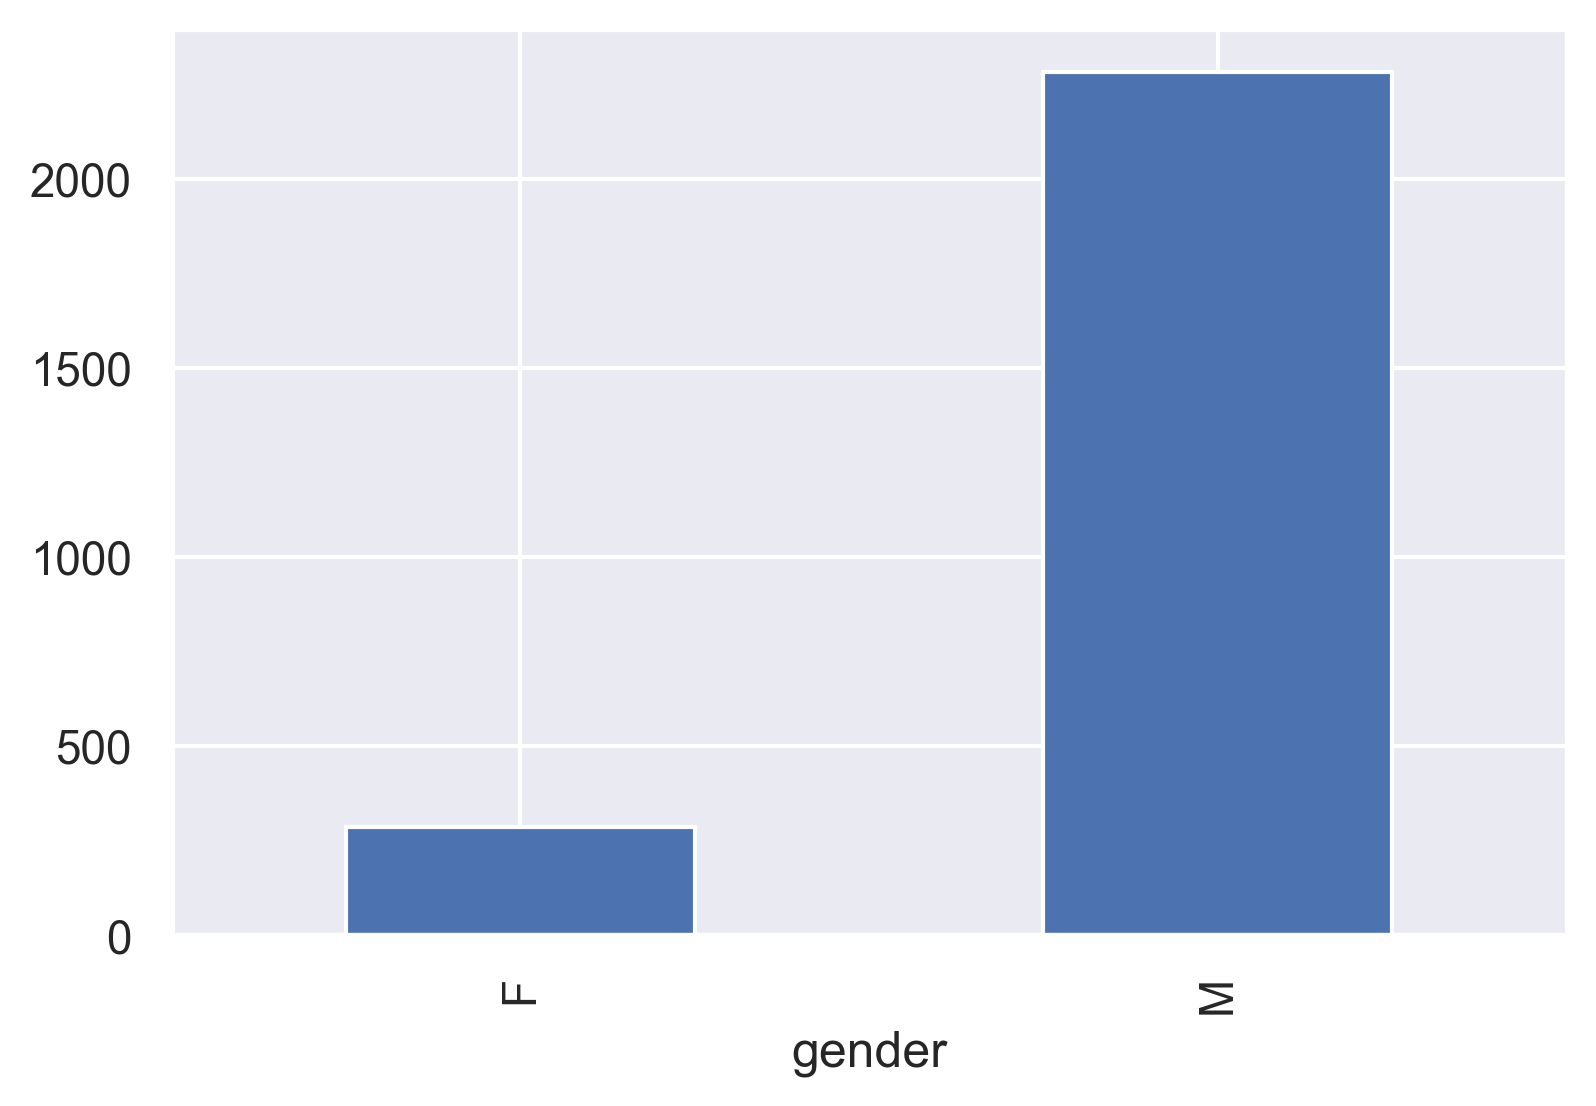

In [22]:
data_gender.size().plot(kind="bar")

In [23]:
#Who are the top 10 richest in the world?
#Dünyanın en zengin ilk 10'u kim?

<AxesSubplot:xlabel='finalWorth', ylabel='personName'>

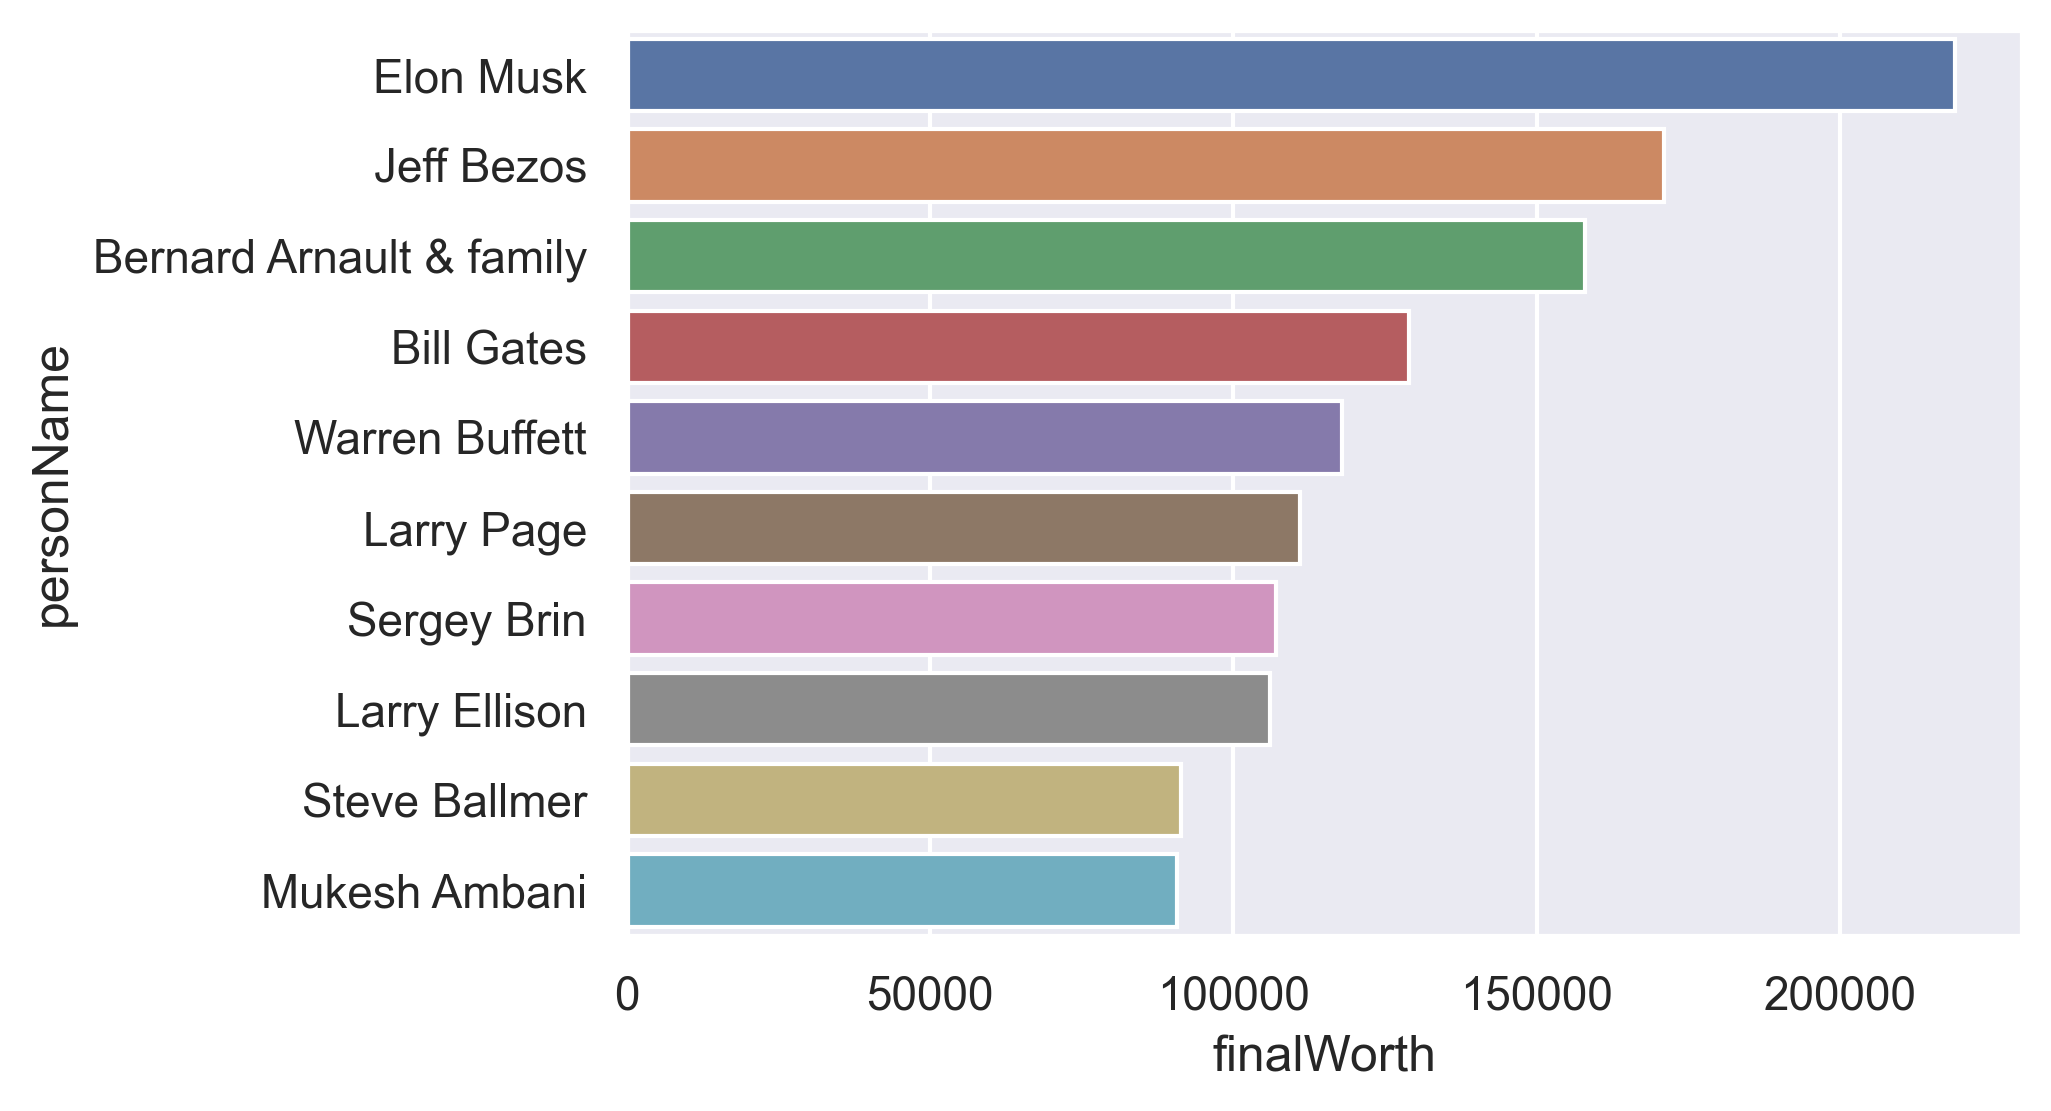

In [25]:
sns.barplot(y=data["personName"][:10]
            , x=data["finalWorth"][:10])

In [26]:
#Which country has the highest number of billionaires?
#En çok milyardere sahip ülke hangisi?

In [27]:
len(data["country"].unique())

73

In [28]:
data_country=data.groupby("country")

In [31]:
data_country_count = pd.DataFrame(
    data_country.size().sort_values(ascending=False), columns=["Count"])

In [32]:
data_country_count.head()

,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


<AxesSubplot:xlabel='Count', ylabel='country'>

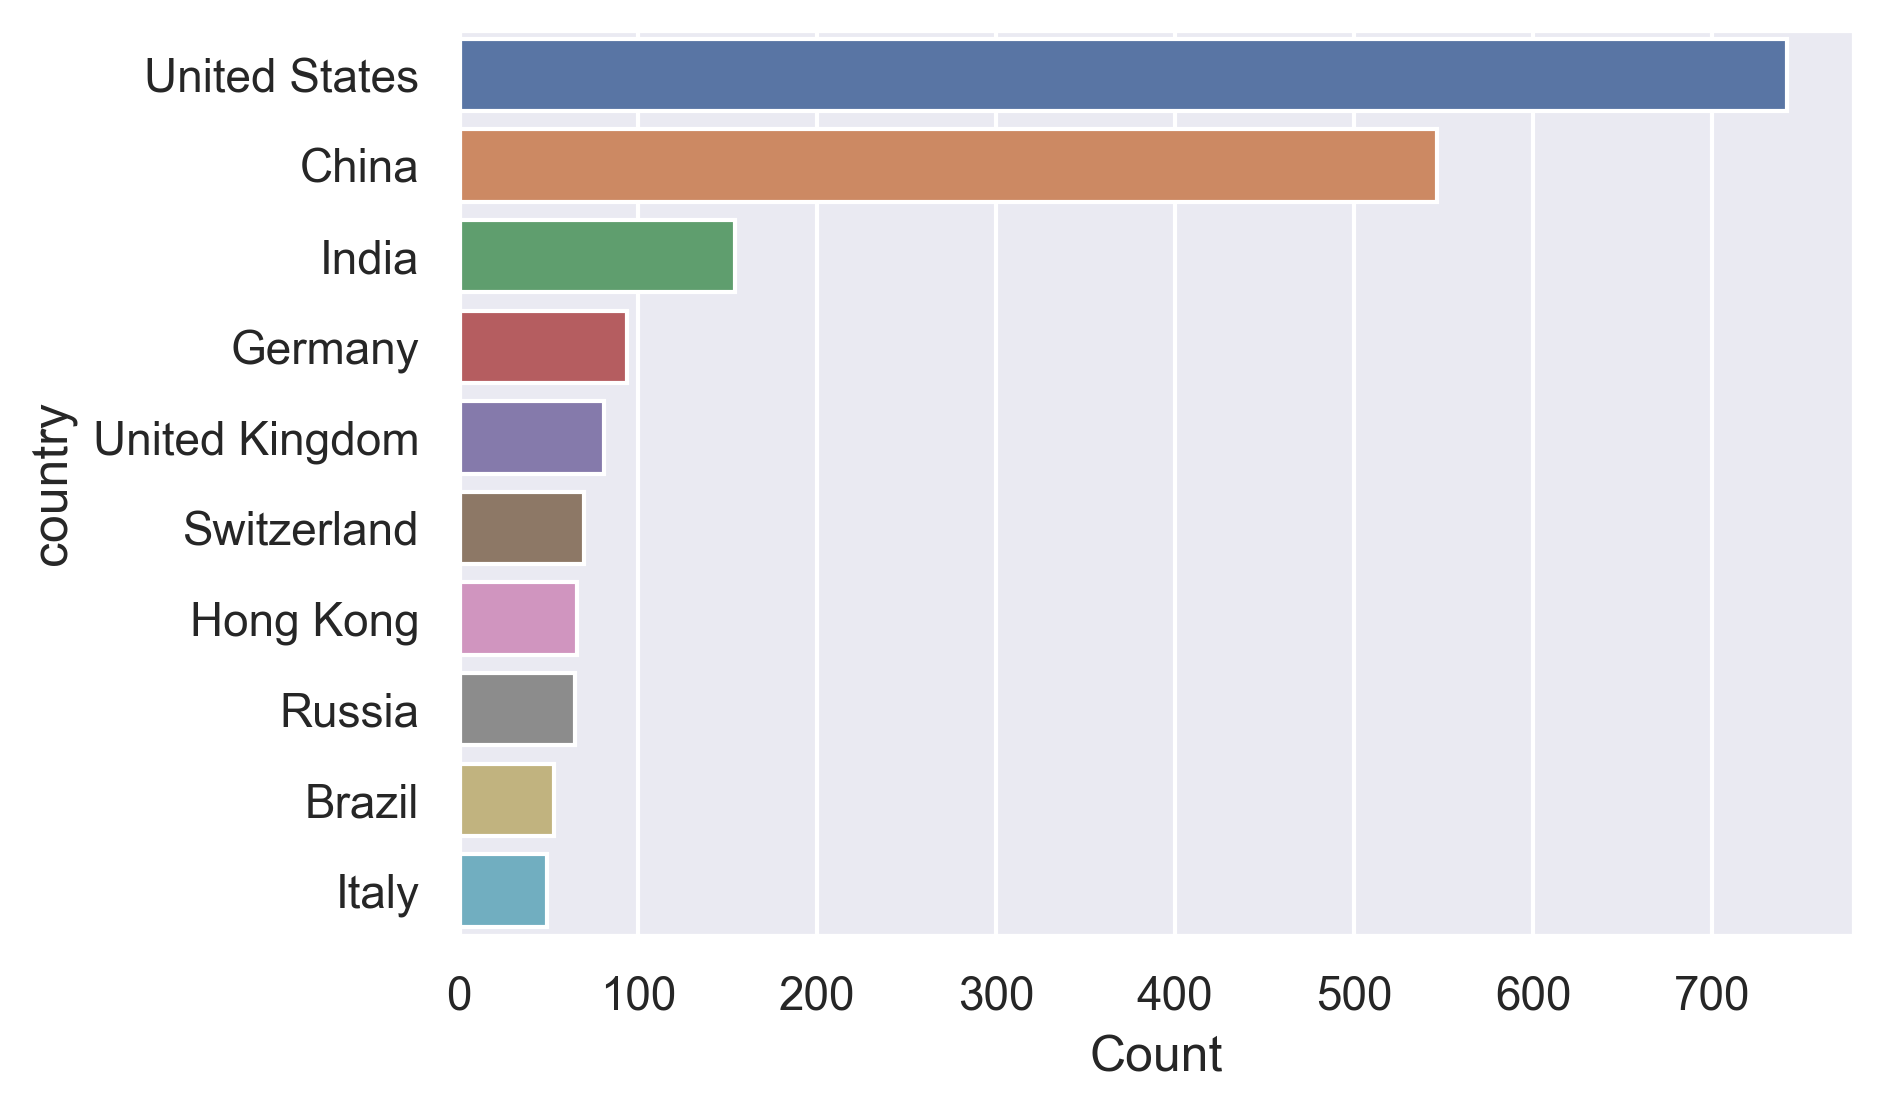

In [33]:
sns.barplot(data_country_count["Count"][:10],data_country_count.index[:10])

In [34]:
#Which category has the most billionaires?
#En çok milyarder hangi kategoride?

In [35]:
data["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [36]:
data["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [41]:
data["category"]=data["category"].apply(lambda x:x.replace(" ","")).\
    apply(lambda x:x.replace("&","_"))

In [42]:
data["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [44]:
data_category=data.groupby("category").size()

In [45]:
data_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [46]:
data_category=data_category.to_frame()

In [47]:
data_category.head()

,0
category,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [48]:
data_category=data_category.rename(columns = {0:"Count"}).\
    sort_values(by = "Count", ascending=False)

In [49]:
data_category.head()

,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


<AxesSubplot:xlabel='Count', ylabel='category'>

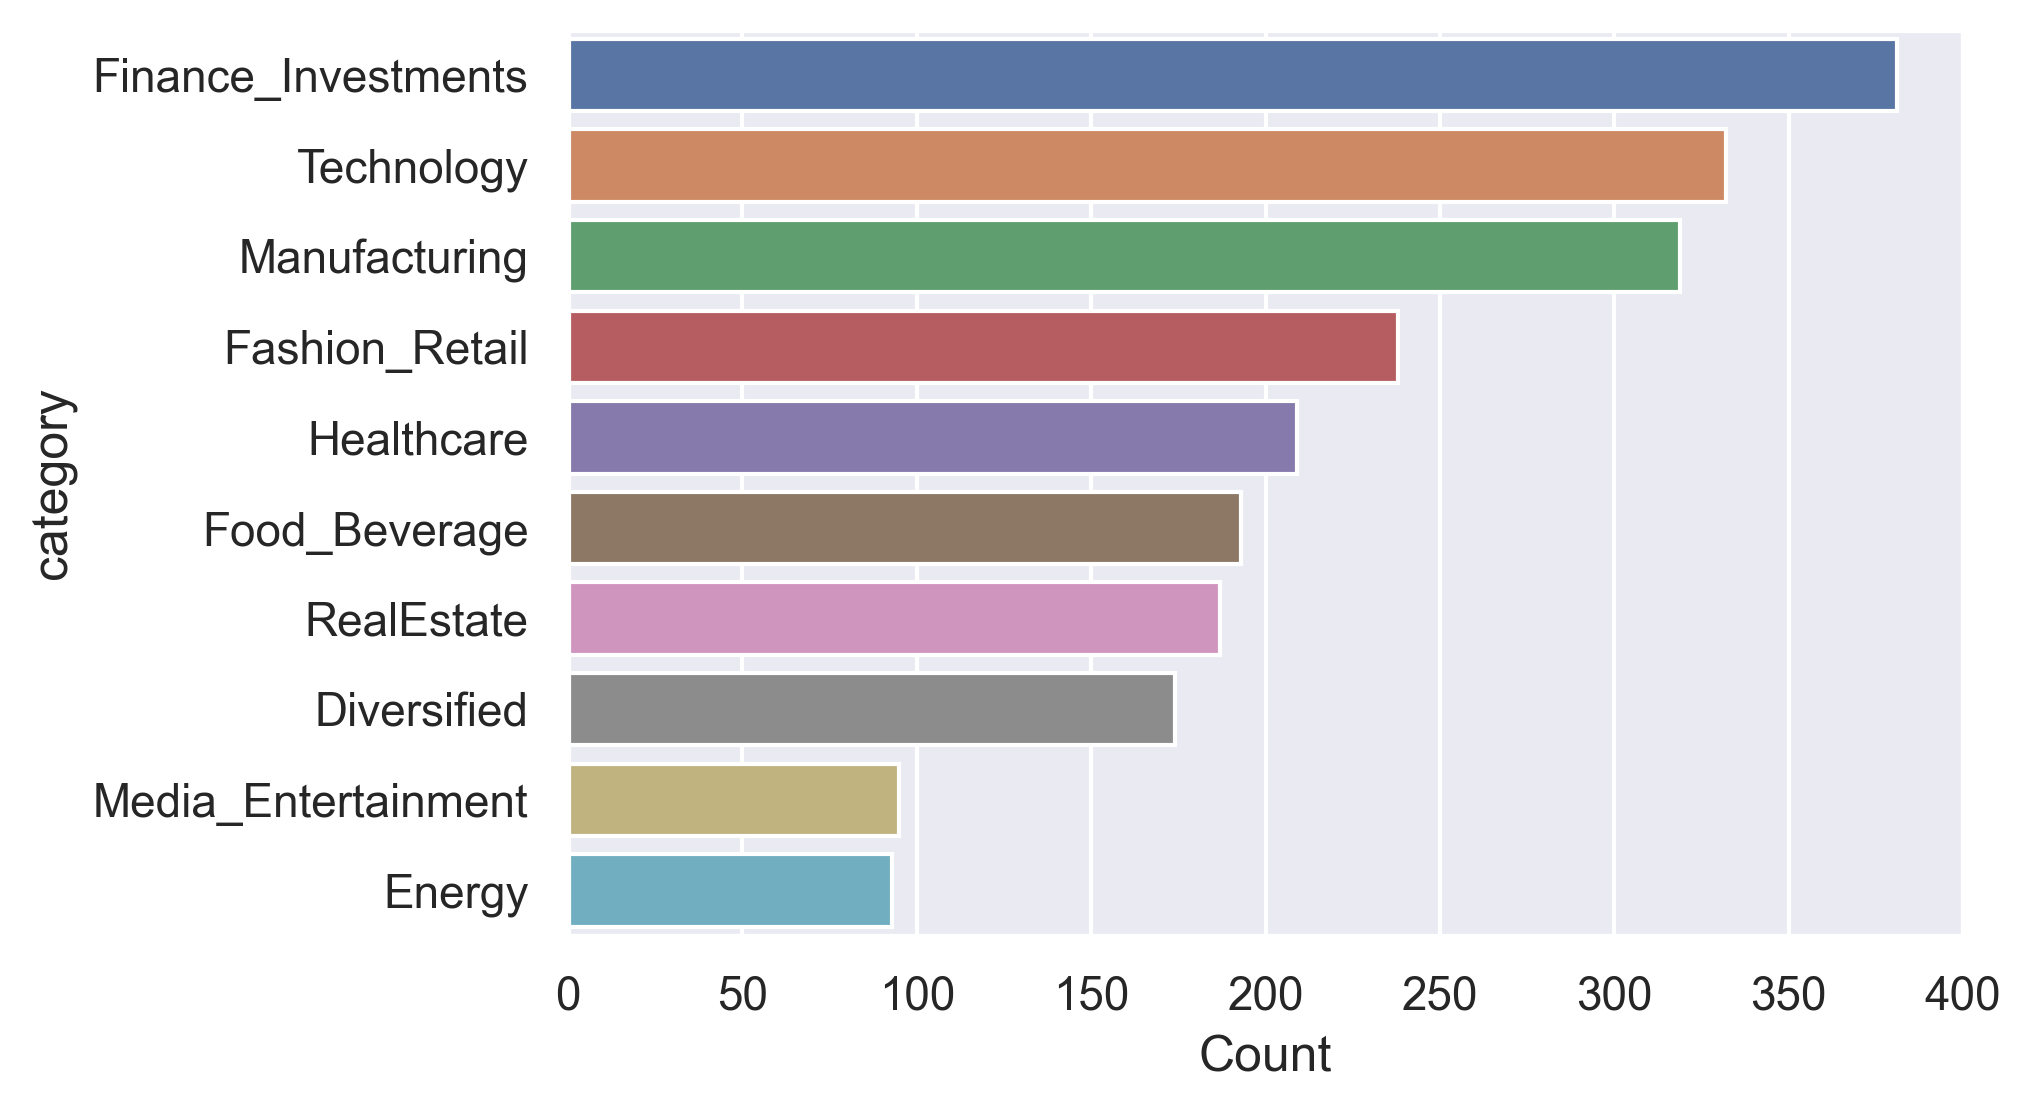

In [50]:
sns.barplot(data_category["Count"][:10], data_category.index[:10])

In [51]:
#The relationship between money and age
#Para ve yaş arasındaki ilişki

<AxesSubplot:xlabel='age', ylabel='finalWorth'>

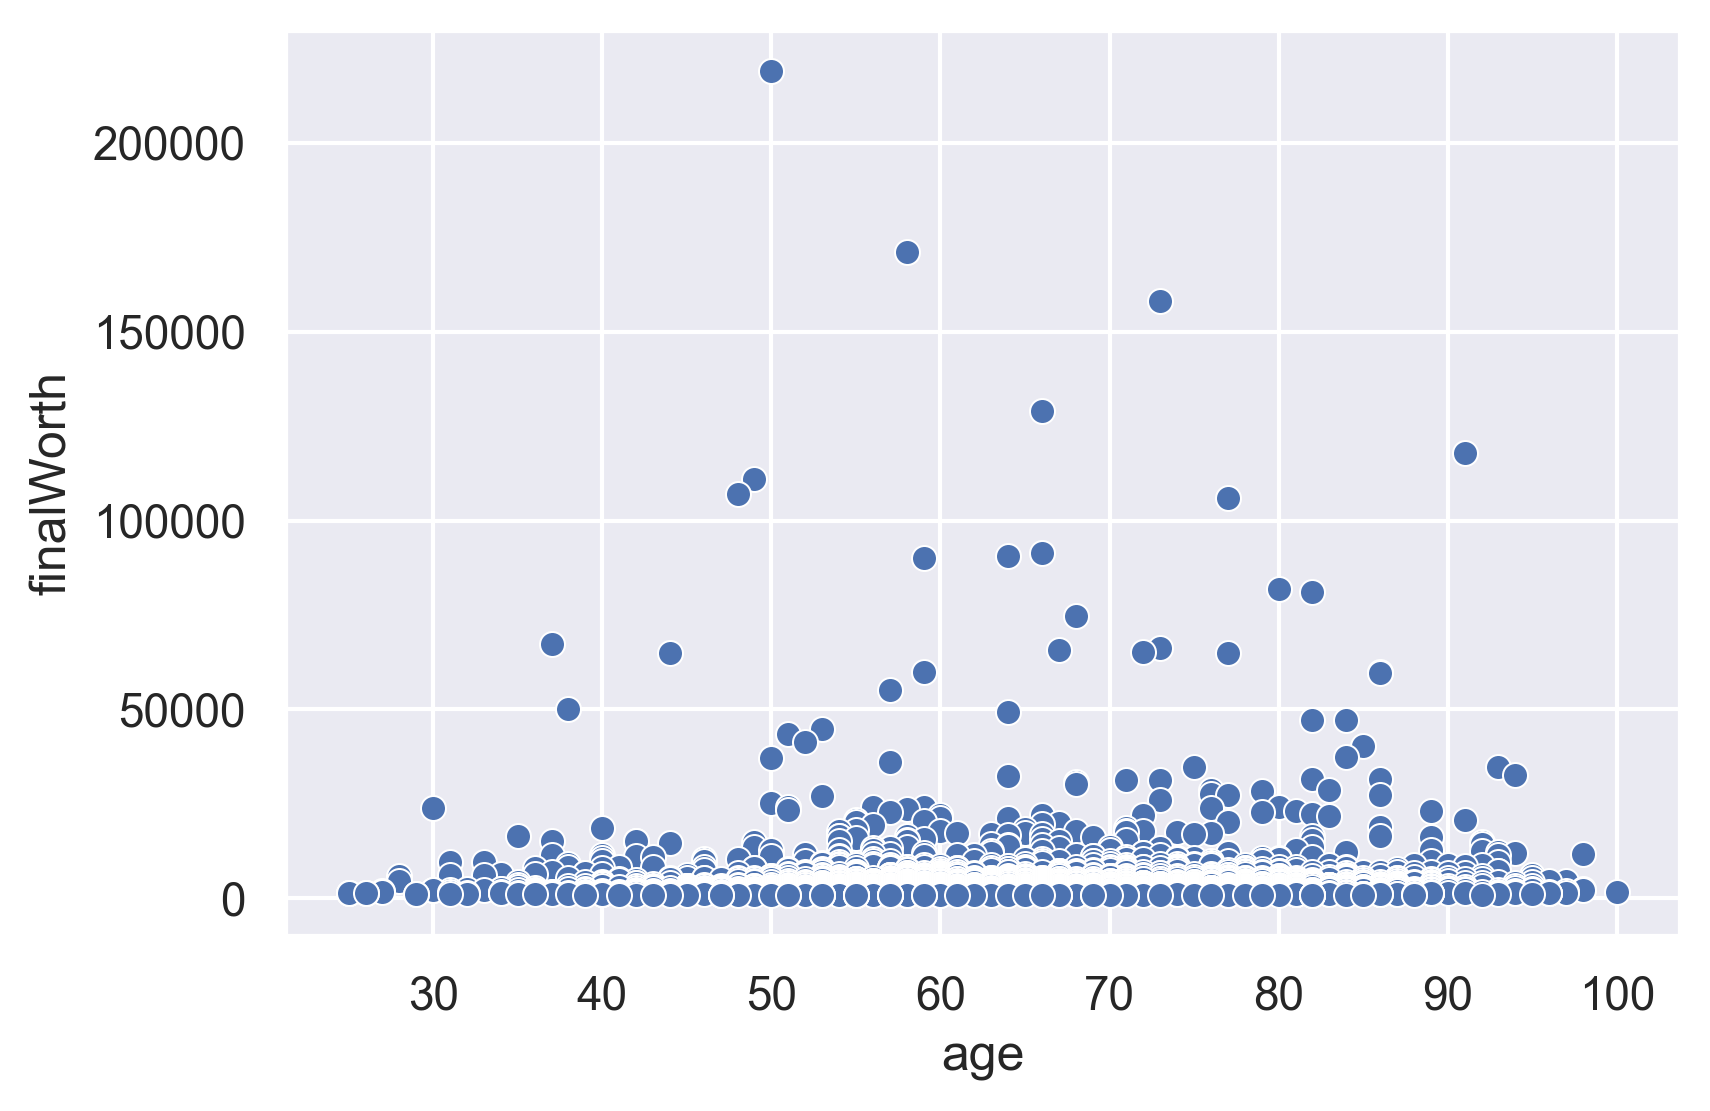

In [52]:
sns.scatterplot(data["age"], data["finalWorth"])

In [53]:
#The distribution of age

<AxesSubplot:xlabel='age', ylabel='Count'>

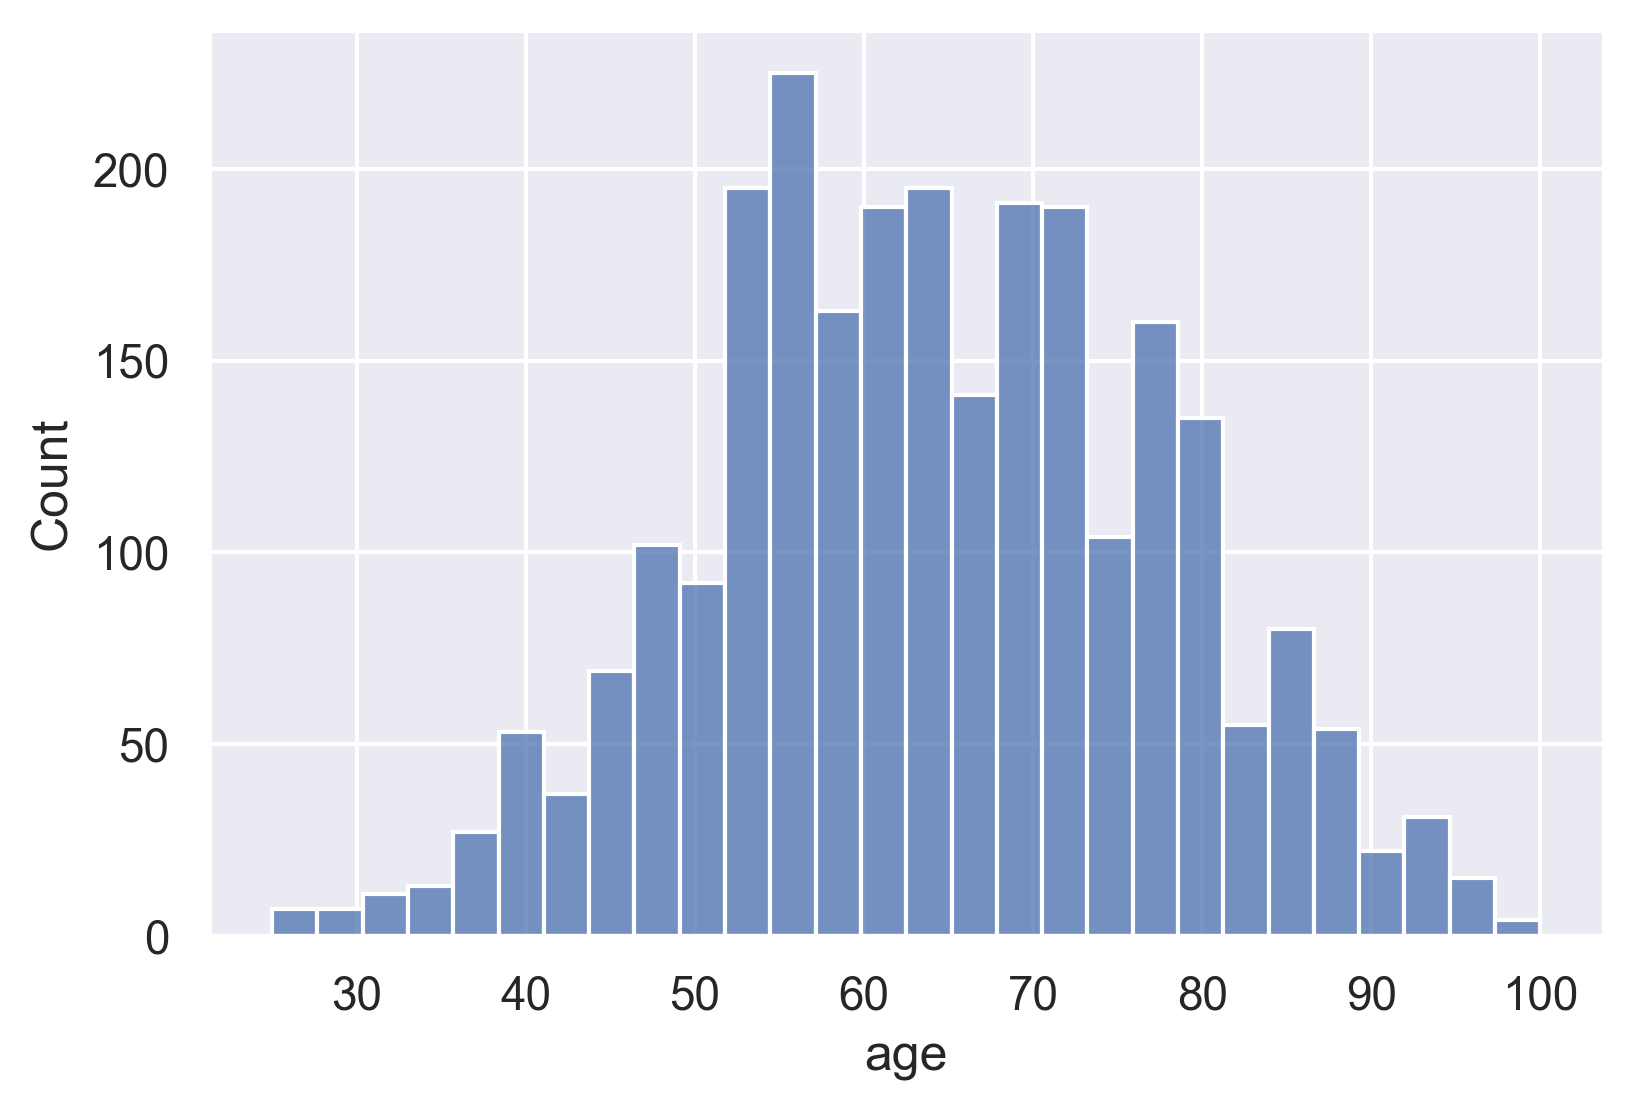

In [54]:
sns.histplot(data["age"])